In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
#import speech_recognition as sr
#from playsound import playsound
import wave
import glob
from scipy.io import wavfile
from scipy.fftpack import fft, fftfreq
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO
import sklearn

filepath_train = "TIMIT/wavfiles16kHz/TRAIN/*.WAV'"
filepath_test = "TIMIT/wavfiles16kHz/TEST/*.WAV'"

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pydub\utils.py:165: RuntimeWarning:

Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work



# Load in the TIMIT data

In [2]:
#For each dialect, append the 'data' result from the wavfile.read, samplerates are all 16k 
def load_audio(filepath, n_dialects):
    list_of_audio = glob.glob(filepath)
    audio_files = [[] for i in range(n_dialects)]
    for file_name in list_of_audio:
        if "\DR1" in file_name:
            audio_files[0].append(wavfile.read(file_name)[1])
        if "\DR2" in file_name:
            audio_files[1].append(wavfile.read(file_name)[1])
        if "\DR3" in file_name:
            audio_files[2].append(wavfile.read(file_name)[1])
        if "\DR4" in file_name:
            audio_files[3].append(wavfile.read(file_name)[1])
        if "\DR5" in file_name:
            audio_files[4].append(wavfile.read(file_name)[1])
        if "\DR6" in file_name:
            audio_files[5].append(wavfile.read(file_name)[1])
        if "\DR7" in file_name:
            audio_files[6].append(wavfile.read(file_name)[1])
#         if "\DR8" in file_name:
#             audio_files[7].append(wavfile.read(file_name)[1])
    return audio_files

In [3]:
audio_data_a1_train = load_audio('TIMIT/wavfiles16kHz/TRAIN/*A1.WAV', 7)
audio_data_a2_train = load_audio('TIMIT/wavfiles16kHz/TRAIN/*A2.WAV', 7)
audio_data_a1_test = load_audio('TIMIT/wavfiles16kHz/TEST/*A1.WAV', 7)
audio_data_a2_test = load_audio('TIMIT/wavfiles16kHz/TEST/*A2.WAV', 7)

In [4]:
lengths_a1_train = [len(i) for i in audio_data_a1_train]
lengths_a2_train = [len(i) for i in audio_data_a2_train]
lengths_a1_test = [len(i) for i in audio_data_a1_test]
lengths_a2_test = [len(i) for i in audio_data_a2_test]

In [5]:
# #D1= 8.6%, D2= 17.2%, D3=17.2%, D4=15.4%, D5=15.9, D6=17.5
lengths_a1_train

[38, 76, 76, 68, 70, 35, 77]

In [6]:
sum(lengths_a1_test)

157

In [7]:
#D1= 7%, D2= 16.5%, D3=16.5%, D4=20.3%, D5=17.8, D6=14.6
lengths_a1_test

[11, 26, 26, 32, 28, 11, 23]

# Visualize # of fragments and signals (Train data)

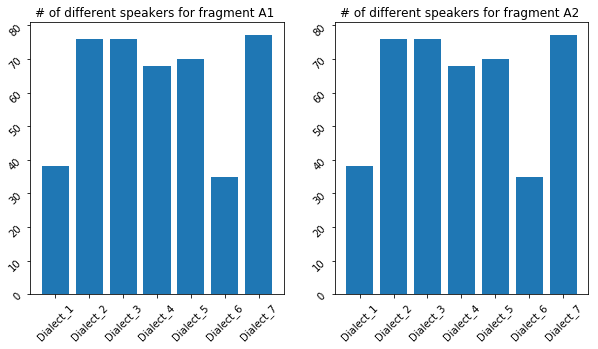

In [8]:
#dialects_old = ['Dialect_1','Dialect_2','Dialect_3','Dialect_4','Dialect_5','Dialect_6','Dialect_7','Dialect_8']
dialects = ['Dialect_1','Dialect_2','Dialect_3','Dialect_4','Dialect_5','Dialect_6','Dialect_7']

fig, ax = plt.subplots(1,2,figsize=(10,5))
y_pos = np.arange(len(dialects))
ax[0].bar(dialects,lengths_a1_train)
ax[1].bar(dialects,lengths_a2_train)
ax[0].set_title("# of different speakers for fragment A1 ")
ax[1].set_title("# of different speakers for fragment A2 ")
ax[0].tick_params(rotation=45)
ax[1].tick_params(rotation=45)

plt.show()

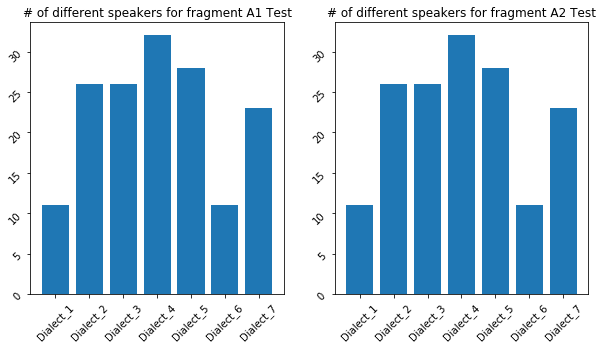

In [9]:
#dialects_old = ['Dialect_1','Dialect_2','Dialect_3','Dialect_4','Dialect_5','Dialect_6','Dialect_7','Dialect_8']
dialects = ['Dialect_1','Dialect_2','Dialect_3','Dialect_4','Dialect_5','Dialect_6','Dialect_7']

fig, ax = plt.subplots(1,2,figsize=(10,5))
y_pos = np.arange(len(dialects))
ax[0].bar(dialects,lengths_a1_test)
ax[1].bar(dialects,lengths_a2_test)
ax[0].set_title("# of different speakers for fragment A1 Test")
ax[1].set_title("# of different speakers for fragment A2 Test")
ax[0].tick_params(rotation=45)
ax[1].tick_params(rotation=45)

plt.show()

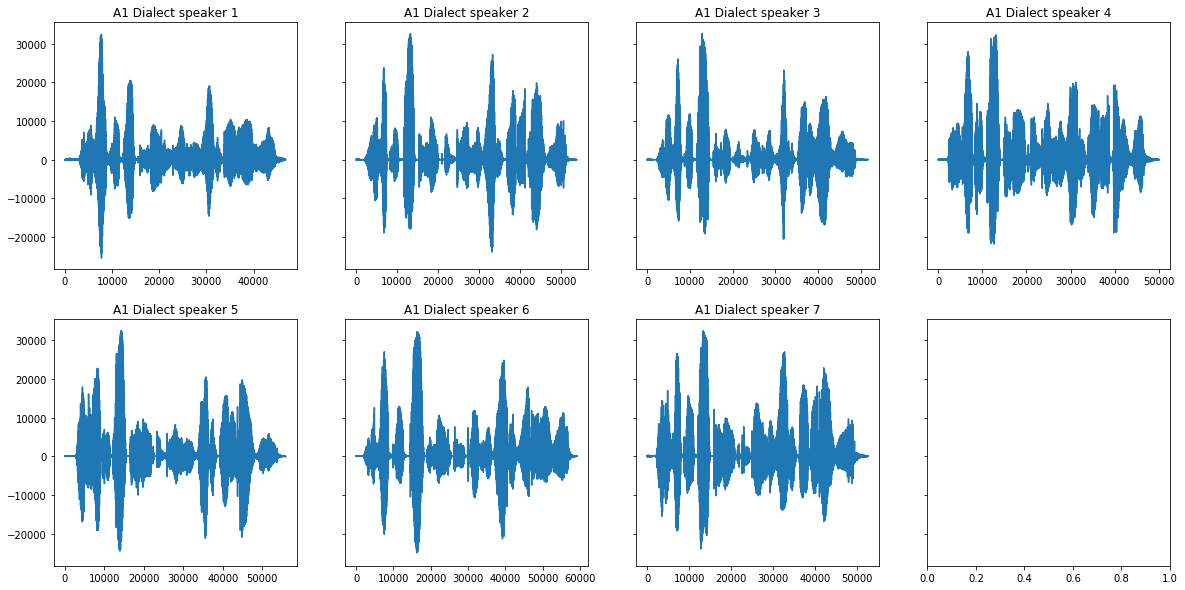

In [10]:
fig, ax = plt.subplots(2,4, sharey=True,figsize=(20,10))
column = 0
row = 0
for i in range(7):
    ax[column,row].plot(audio_data_a1_train[i][0])
    ax[column,row].set_title("A1 Dialect speaker "+str(i+1))
    row+=1
    if row == 4:
        column +=1
        row = 0
plt.show()

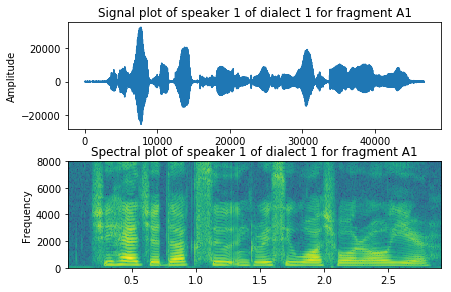

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.tight_layout()
ax1.set_title('Signal plot of speaker 1 of dialect 1 for fragment A1')
ax1.plot(pd.DataFrame(audio_data_a1_train).iloc[0][0])
ax1.set_ylabel('Amplitude')

ax2.set_title('Spectral plot of speaker 1 of dialect 1 for fragment A1')
ax2.specgram(pd.DataFrame(audio_data_a1_train).iloc[0][0],Fs=16000)
ax2.set_ylabel('Frequency')
plt.show()

In [12]:
#ONLY FIRST DIALECT ATM
def audio_to_fft(audio_list):
    return [fft(i) for i in audio_list]

#Get the absolute value of real and complex component:
def fft_to_abs(fft_list):
    return [abs(i) for i in fft_list]

def fft_sample_frequencies(samples_shape, samplerate):
    freqs = fftfreq(samples_shape,1/samplerate)
    return freqs

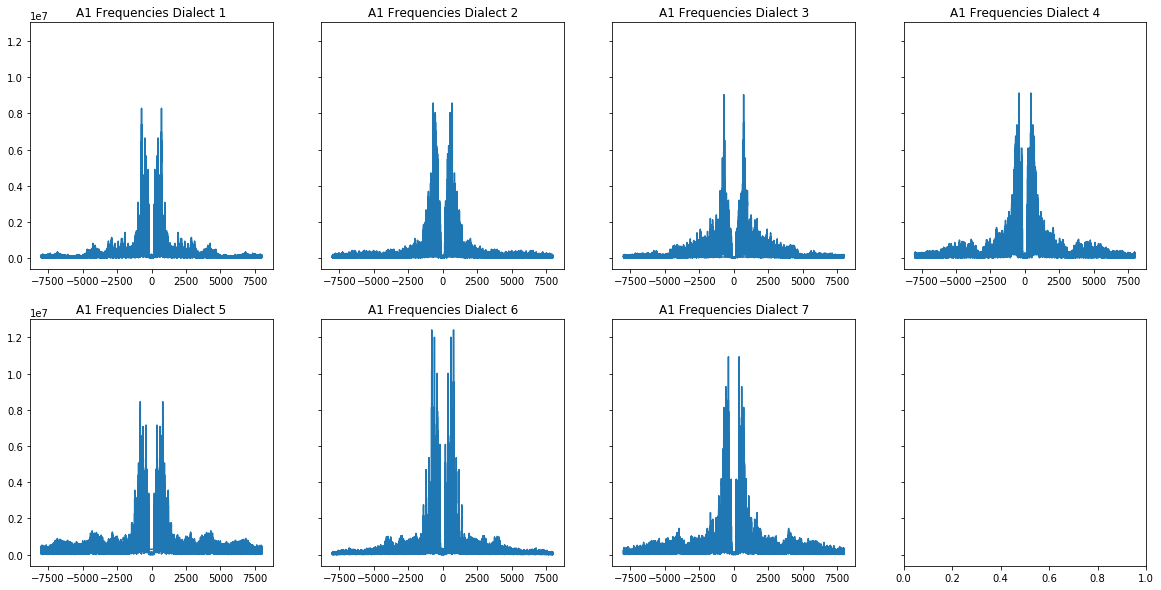

In [13]:
#Get fft data first dialect -> get absolute fft value first speaker -> get sample frequencies of that sample
a1_dialects = [audio_to_fft(x) for x in audio_data_a1_train]

a1_dialects_abs = [fft_to_abs(x) for x in a1_dialects]

fig, ax = plt.subplots(2,4, sharey=True,figsize=(20,10))

column = 0
row = 0
for i in range(7):
    ax[column,row].plot(fftfreq(audio_data_a1_train[i][0].shape[0], 1/16000), a1_dialects_abs[i][0])
    ax[column,row].set_title("A1 Frequencies Dialect "+str(i+1))
    row+=1
    if row == 4:
        column +=1
        row = 0
plt.show()

In [14]:
#Length of fragment of first speaker in first dialect
len(a1_dialects_abs[0][0])

46797

# RQ1: Dialect Classification

## Audio features extraction with pyAudioAnalysis package
#### slides from https://docs.google.com/presentation/d/1heH7rKGEEySVh3sK583MuwqlNwACiAerHQw4JQTntI4/edit#slide=id.g3fe70a6a5b_0_0

**Zero Crossing Rate (zcr)**: rate of sign changes during the frame, measure of noisiness, high values for noisy signals

**Energy**: usually normalized by window length, high variation over successive speech frames (std statistic)

**Energy_entropy**: measure of abrupt changes in the signal’s energy

**Spectral_centroid**: Center of gravity of the spectrum

**Spectral_spread**: 2nd central moment of the spectrum

**Spectral_entropy**: Divide spectrum into L sub-bands, Compute normalized sub-band energies (Ef), compute entropy

**Spectral_flux**: Spectral change between two successive frames

**Spectral_rolloff**: Freq below which a percentage of the mag distribution of the spectrum is concentrated

**mfcc_1 - mfcc_13**: Mel-Frequency Cepstral Coefficients

**Chroma_1 - Chroma_12**: 12-element frequency representation, In music applications

**Chrome std**: std of Chroma

#  Feature extraction

In [15]:
#Energy --> usually normalized by window length, high variation over successive speech frames (std statistic)
#Energy Entropy --> measure of abrupt changes in signal's energy, divided in K sub-frames and compute (normalized) sub-energies(e_subframe_k)
#compute entropy of e_subframe_k sequence

def extract_features(audio_data, samplerate):
    fragments = []
    for dialect in range(len(audio_data)):
        for speaker in range(len(audio_data[dialect])):
            s =pd.DataFrame(audio_data).iloc[dialect][speaker]
            fs = samplerate
            duration = len(s) / float(fs)
            #Steps of 0.05 s
            #[f,fn] = aF.feature_extraction(s,fs,int(fs*0.050),int(fs*0.050))
            
            #"She had your dark suit in greasy washwater all year = 10 words"
            #"Don't ask me to carry an oily rag like that = 10 words"
            
            #Steps fixed on duration, mean fragment length = 3.360 --> mean 0.3360 seconds per word -> split in 10
            window = 0.05
            [f,fn] = aF.feature_extraction(s,fs,int(fs* window),int(fs*window))
            
            #zcr, energy
            #fragments.append(pd.DataFrame(f[0:3],fn[0:3]).T)
            
            #zcr, energy, spectral
            #fragments.append(pd.DataFrame(f[0:8],fn[0:8]).T)
            
            #zcr, energy, spectral, mfcc
            fragments.append(pd.DataFrame(f[0:21],fn[0:21]).T)
            
            #zcr, energy, spectral, mfcc, chrona
            #fragments.append(pd.DataFrame(f,fn).T)
    return fragments

In [90]:
#Compute feature sets for A1 and A2 fragments
#a1_features_train = extract_features(audio_data_a1_train, 16000)
a2_features_train = extract_features(audio_data_a2_train, 16000)

#a1_features_test = extract_features(audio_data_a1_test, 16000)
a2_features_test = extract_features(audio_data_a2_test, 16000)

In [91]:
#a1_features_train[0][0:1]

In [92]:
#a1_features_test[0][0:1]

In [93]:
#fragment_features = a1_features + a2_features

In [94]:
#Speakers per dialect
lengths_a1_train

[38, 76, 76, 68, 70, 35, 77]

In [95]:
lengths_a1_test

[11, 26, 26, 32, 28, 11, 23]

# Create labels for Train and Test data

In [40]:
# #Set labels for each 0.05 label
# for fragment in a1_features_train[0:38]:
#     fragment['label'] = 0
# for fragment in a1_features_train[38:114]:
#     fragment['label'] = 1
# for fragment in a1_features_train[114:190]:
#     fragment['label'] = 2
# for fragment in a1_features_train[190:258]:
#     fragment['label'] = 3
# for fragment in a1_features_train[258:328]:
#     fragment['label'] = 4
# for fragment in a1_features_train[328:363]:
#     fragment['label'] = 5
# for fragment in a1_features_train[363:440]:
#     fragment['label'] = 6      

# #Flatten list of list of windows -> list of windows with label
# X_train =[]
# for fragment in a1_features_train:
#     X_train.append(fragment.to_numpy())
# y_train = [int(fragment[-1]) for dialect in X_train for fragment in dialect]
# X_train = np.array([fragment[0:-1] for dialect in X_train for fragment in dialect])

In [96]:
#Set labels for each 0.05 label
for fragment in a2_features_train[0:38]:
    fragment['label'] = 0
for fragment in a2_features_train[38:114]:
    fragment['label'] = 1
for fragment in a2_features_train[114:190]:
    fragment['label'] = 2
for fragment in a2_features_train[190:258]:
    fragment['label'] = 3
for fragment in a2_features_train[258:328]:
    fragment['label'] = 4
for fragment in a2_features_train[328:363]:
    fragment['label'] = 5
for fragment in a2_features_train[363:440]:
    fragment['label'] = 6      

#Flatten list of list of windows -> list of windows with label
X_train =[]
for fragment in a2_features_train:
    X_train.append(fragment.to_numpy())
y_train = [int(fragment[-1]) for dialect in X_train for fragment in dialect]
X_train = np.array([fragment[0:-1] for dialect in X_train for fragment in dialect])

In [42]:
# #Set labels for each 0.05 label
# for fragment in a1_features_test[0:11]:
#     fragment['label'] = 0
# for fragment in a1_features_test[11:37]:
#     fragment['label'] = 1
# for fragment in a1_features_test[37:63]:
#     fragment['label'] = 2
# for fragment in a1_features_test[63:95]:
#     fragment['label'] = 3
# for fragment in a1_features_test[95:123]:
#     fragment['label'] = 4
# for fragment in a1_features_test[123:134]:
#     fragment['label'] = 5
# for fragment in a1_features_test[134:157]:
#     fragment['label'] = 6      

# #Flatten list of list of windows -> list of windows with label
# X_test =[]
# for fragment in a1_features_test:
#     X_test.append(fragment.to_numpy())
# y_test = [int(fragment[-1]) for dialect in X_test for fragment in dialect]
# X_test = np.array([fragment[0:-1] for dialect in X_test for fragment in dialect])

In [97]:
#Set labels for each 0.05 label
for fragment in a2_features_test[0:11]:
    fragment['label'] = 0
for fragment in a2_features_test[11:37]:
    fragment['label'] = 1
for fragment in a2_features_test[37:63]:
    fragment['label'] = 2
for fragment in a2_features_test[63:95]:
    fragment['label'] = 3
for fragment in a2_features_test[95:123]:
    fragment['label'] = 4
for fragment in a2_features_test[123:134]:
    fragment['label'] = 5
for fragment in a2_features_test[134:157]:
    fragment['label'] = 6      

#Flatten list of list of windows -> list of windows with label
X_test =[]
for fragment in a2_features_test:
    X_test.append(fragment.to_numpy())
y_test = [int(fragment[-1]) for dialect in X_test for fragment in dialect]
X_test = np.array([fragment[0:-1] for dialect in X_test for fragment in dialect])

In [98]:
#Split up data in Train, test, val
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
#X_test, X_val, y_test, y_val = train_test_split(np.array(X_test), np.array(y_test), test_size=0.5, random_state=1)

In [99]:
#Spectral Mean Subtraction on mfcc columns
def get_mfcc_means(array):
    mfcc_means = []
    for feature_list in array:
        mfcc_means.append(feature_list[8:])
    mfcc_means = pd.DataFrame(mfcc_means).mean()
    return mfcc_means

#Get mean of mfcc and subtract from training/test/val, to not introduce a bias in these sets (otherwise extracting statistics from test/holdout set might reduce plausibility of results)
mfcc_means_train = get_mfcc_means(X_train)

#Apply Spectral mean subtraction on train/test/val
for train_sample in X_train:
    train_sample[8:] = train_sample[8:] - mfcc_means_train
for test_sample in X_test:
    test_sample[8:] = test_sample[8:] - mfcc_means_train
# for val_sample in X_val:
#     val_sample[8:] = val_sample[8:] - mfcc_means_train

# Running the model

In [133]:
len(X_test)

8757

In [134]:
len(X_train)

24526

In [102]:
features = ['zcr', 'energy', 'energy_entropy', 'spectral_centroid',
       'spectral_spread', 'spectral_entropy', 'spectral_flux',
       'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4',
       'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10',
       'mfcc_11', 'mfcc_12', 'mfcc_13']

              precision    recall  f1-score   support

           0       0.08      0.03      0.05       628
           1       0.18      0.21      0.20      1477
           2       0.16      0.20      0.18      1434
           3       0.18      0.12      0.14      1800
           4       0.18      0.19      0.18      1502
           5       0.06      0.03      0.04       596
           6       0.16      0.23      0.19      1320

   micro avg       0.16      0.16      0.16      8757
   macro avg       0.14      0.14      0.14      8757
weighted avg       0.16      0.16      0.16      8757

0.1639830992348978


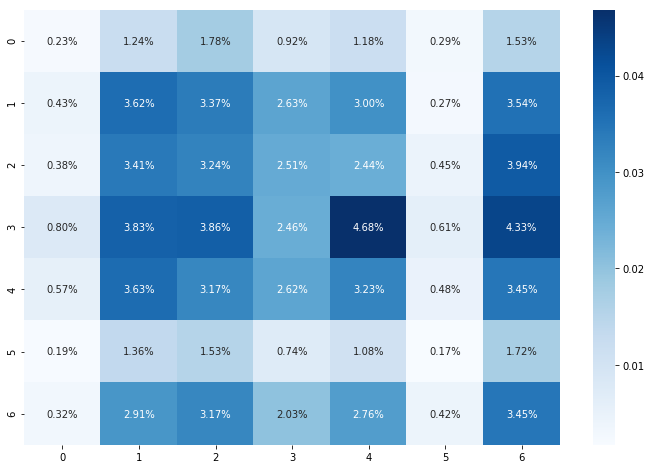

In [103]:
#Class imbalance for dialect 1 and 6 so use stratifiedKFold
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
#Train = 73.5%, Test = 13.2%, Validation = 13.2%

#Create np arrays otherwise XGB is not compatible
# X_train = np.array(X_train)
# y_train = np.array(y_train)
#X_test = np.array(X_test)
# y_test = np.array(y_test)

#Fit on training data
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

#Stratified KFold on training set
#kfold = StratifiedKFold(n_splits=5, random_state=7)
#scores = cross_val_score(model,X_train,y_train,cv=kfold)
#print("K-fold CV average score: %.2f" % scores.mean())

#Predict on test set
y_pred = model.predict(X_test)

#Print evaluation metric results
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

#Get the confusion matrix
plt.figure(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

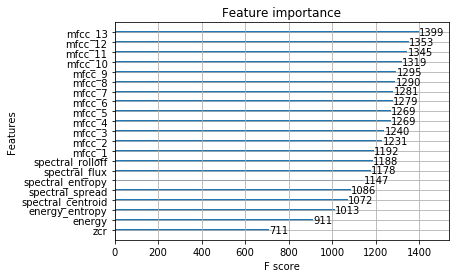

In [104]:
# feature importance
from matplotlib import pyplot
from xgboost import plot_importance
# plot feature importance
plot_importance(model).set_yticklabels(features)
pyplot.show()

In [131]:
A1_labels = ['mfcc_8','energy_entropy','mfcc_7','mfcc_6','mfcc_12'
             ,'mfcc_13','mfcc_9','mfcc_4','mfcc_5','mfcc_3', 'mfcc_10'
             ,'mfcc_11','spectral_flux','spectral_spread','mfcc_2','energy'
            ,'spectral_entropy','mfcc_1','spectral_centroid','zcr','spectral_rolloff']
A1_labels.reverse()

A2_labels = ['mfcc_5','mfcc_6','mfcc_4','mfcc_8','mfcc_7','mfcc_12'
             ,'mfcc_10','mfcc_9','mfcc_11','energy_entropy','mfcc_3','mfcc_13'
            ,'mfcc_2','energy','spectral_flux','spectral_spread','spectral_entropy','mfcc_1','zcr','spectral_centroid','spectral_rolloff']
A2_labels.reverse()

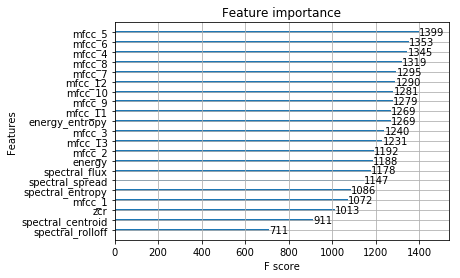

In [132]:
plot_importance(model).set_yticklabels(A2_labels)
pyplot.show()

In [130]:
a2_features_train[0].columns[7]

'spectral_rolloff'

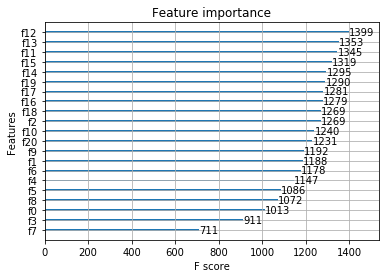

In [105]:
plot_importance(model)
pyplot.show()

In [55]:
plot_importance?

In [135]:
%%time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Construct some pipelines
pipe_lr = Pipeline([
			('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('pca', PCA(n_components=10)),
			('clf', LogisticRegression(random_state=42))])

pipe_svm = Pipeline([('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([('pca', PCA(n_components=10)),
			('clf', svm.SVC(random_state=42))])

pipe_xgb = Pipeline([('clf', xgb.XGBClassifier(random_state=42))])

pipe_xgb_pca = Pipeline([('pca', PCA(n_components=10)),
                     ('clf', xgb.XGBClassifier(random_state=42))])

# Set grid search params
param_range = [2, 4, 6, 8, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

grid_params_xgb = [{
        'clf__eta': param_range_fl,
        'clf__max_depth': param_range,
        'clf__subsample': param_range_fl,
        'clf__colsample_bytree': param_range_fl}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=5) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=5)
			

gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=5,
			n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=5,
			n_jobs=jobs)

gs_xgb = GridSearchCV(estimator=pipe_xgb,
			param_grid=grid_params_xgb,
			scoring='accuracy',
			cv=5,
			n_jobs=jobs)

gs_xgb_pca = GridSearchCV(estimator=pipe_xgb_pca,
			param_grid=grid_params_xgb,
			scoring='accuracy',
			cv=5,
			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_svm, gs_svm_pca, gs_xgb, gs_xgb_pca]
#grids = [gs_xgb, gs_xgb_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Support Vector Machine', 3: 'Support Vector Machine w/PCA',
        4: 'XGBoost', 5:'XGBoost w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(y_test, y_pred) > best_acc:
		best_acc = accuracy_score(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.168
Test set accuracy score for best params: 0.183 

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.164
Test set accuracy score for best params: 0.182 

Estimator: Support Vector Machine
Best params: {'clf__C': 8, 'clf__kernel': 'rbf'}
Best training accuracy: 0.173
Test set accuracy score for best params: 0.179 

Estimator: Support Vector Machine w/PCA
Best params: {'clf__C': 10, 'clf__kernel': 'rbf'}
Best training accuracy: 0.175
Test set accuracy score for best params: 0.175 

Estimator: XGBoost
Best params: {'clf__colsample_bytree': 0.1, 'clf__eta': 0.1, 'clf__max_depth': 8, 'clf__subsample': 1.0}
Best training accuracy: 0.174
Test set accuracy score for best params: 0.174 

Estimator: XGBoost w/PCA
Best params: {'clf__co

In [32]:
%%time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
			('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', svm.SVC(random_state=42))])

pipe_xgb = Pipeline([('scl', StandardScaler()),
                     ('clf', xgb.XGBClassifier(random_state=42))])

pipe_xgb_pca = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', xgb.XGBClassifier(random_state=42))])

# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

grid_params_xgb = [{
        'clf__eta': param_range_fl,
        'clf__max_depth': param_range,
        'clf__subsample': param_range_fl,
        'clf__colsample_bytree': param_range_fl}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=5) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=5)
			

gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=5,
			n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=5,
			n_jobs=jobs)

gs_xgb = GridSearchCV(estimator=pipe_xgb,
			param_grid=grid_params_xgb,
			scoring='accuracy',
			cv=5,
			n_jobs=jobs)

gs_xgb_pca = GridSearchCV(estimator=pipe_xgb_pca,
			param_grid=grid_params_xgb,
			scoring='accuracy',
			cv=5,
			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_svm, gs_svm_pca, gs_xgb, gs_xgb_pca]
#grids = [gs_xgb, gs_xgb_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Support Vector Machine', 3: 'Support Vector Machine w/PCA',
        4: 'XGBoost', 5:'XGBoost w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(y_test, y_pred) > best_acc:
		best_acc = accuracy_score(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 0.5, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.169
Test set accuracy score for best params: 0.180 

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.168
Test set accuracy score for best params: 0.180 

Estimator: Support Vector Machine
Best params: {'clf__C': 1, 'clf__kernel': 'rbf'}
Best training accuracy: 0.177
Test set accuracy score for best params: 0.178 

Estimator: Support Vector Machine w/PCA
Best params: {'clf__C': 2, 'clf__kernel': 'rbf'}
Best training accuracy: 0.174
Test set accuracy score for best params: 0.175 

Estimator: XGBoost
Best params: {'clf__colsample_bytree': 0.1, 'clf__eta': 0.1, 'clf__max_depth': 7, 'clf__subsample': 1.0}
Best training accuracy: 0.177
Test set accuracy score for best params: 0.174 

Estimator: XGBoost w/PCA
Best params: {'clf__col

# Approaches to dialect clustering/classification (Hansen et al, 2004)

* **Dialect-adapted model**: train base model and adapt base model to each dialect using available training data *from that dialect*

* **Dialect-trained model**: obtain dialect-trained models using only the available data for each dialect and train the models.

### Scoring methods:

* **Utterence-based scoring**: score each utterance separately and then classify the dialect
* **Speaker-based scoring**: use all data from one speaker and decide the dialect for the input speaker (**more desirable, since the speaker is more likely to convey dialect dependent information over longer audio sequences**)

### Best results were gained by dialect-trained models and speaker-dependent scoring strategy

# Dialect Clustering Project

* **Cluster time-window fragments of A1 + A2** to analyze whether the time windows of different dialects can be grouped on acoustics / speaker type / pronunciation (with corresponding evaluation metrices and explaination on why these clusters are formed)

    - **Dialect Analysis and Modeling for Automatic Classification by Hansen et al. (2004)** -> Last dialect removed since it covers "speakers who moved frequently across the U.S.". Found clusters show that 60% of the speakers are classified as either Dialect 2 or Dialect 4, whereas none of the speakers were classified as dr6.


* **Analyze feature importances of predicting the dialect label** for the time-windows, this can further indicate what characterizes each dialect (preliminary results on my test set show a f1-score of 0.8 on this task with GridSearchCV, XGB and PCA)  [different param setups can be tested as well as classifiers, dimensionality reduction methods and feature sets.]


* **Compare these results with the literature on dialect research** (specifically on TIMIT) to see whether my findings are similar and explain why (not). 

# RQ2: Dialect Clustering

In [29]:
import hdbscan
from sklearn import metrics

db = hdbscan.HDBSCAN().fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_train, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_train, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_train, labels))

Estimated number of clusters: 2
Estimated number of noise points: 2549
Homogeneity: 0.038
Completeness: 0.125
V-measure: 0.059
Adjusted Rand Index: 0.026
Adjusted Mutual Information: 0.037


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: -0.033


In [30]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:, 0], X_train[:, 1],
            c=labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral_r', 10))
plt.title(" HDBSCAN clustering min_samples per cluster = 10")
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

TypeError: list indices must be integers or slices, not tuple

<Figure size 864x576 with 0 Axes>

In [32]:
#Add clustered label to original data set
labels

4620

In [36]:
clustered_words = a1_features

for fragment in a1_features:
    for window in fragment:
        print(window)

zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
m

mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1

mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5

mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
m

mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff
mfcc_1
mfcc_2
mfcc_3
mfcc_4
mfcc_5
mfcc_6
mfcc_7
mfcc_8
mfcc_9
mfcc_10
mfcc_11
mfcc_12
mfcc_13
zcr
energy
energy_entropy
spectral_centroid
spectral_spread
spectral_entropy
spectral_flux
spectral_rolloff

In [31]:
a1_features[0]

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,0.222103,0.000766,1.401356,0.455764,0.227296,2.321736,0.000000,0.561351,-26.957248,0.867839,...,-0.629676,0.117659,-0.901153,-0.321472,-0.430984,-0.159619,-0.251717,0.107812,-0.209753,0.222579
1,0.099829,0.038530,2.316204,0.231783,0.201242,0.892054,0.003985,0.210346,-21.578853,0.172397,...,-1.262315,-0.385076,-0.234689,-0.964532,0.006092,-0.198305,-0.426617,-0.655591,-0.986168,0.037567
2,0.166097,0.017092,2.356974,0.236534,0.226917,1.013484,0.005413,0.112441,-21.719466,1.183905,...,-0.591756,-0.203584,-0.157232,-0.302113,-0.388053,0.558287,-0.024608,0.142115,-0.600210,-0.871491
3,0.285378,0.006494,1.517038,0.290094,0.292269,1.122086,0.002396,0.142796,-22.520277,1.414442,...,-0.498027,-0.239375,0.219516,-0.253895,-0.359076,0.097775,-0.326989,-0.433725,-0.317232,-0.412560
4,0.073536,0.005274,2.450419,0.186061,0.209537,0.329171,0.003411,0.059427,-23.922661,2.131246,...,-0.711985,-1.269942,-0.550263,0.146188,-0.198172,0.028782,-0.381025,-0.699901,-0.643287,-0.720146
5,0.236640,0.004699,2.870193,0.362426,0.323559,0.879511,0.003338,0.249679,-24.046776,1.278989,...,-1.050154,-1.039826,-0.842853,-0.757826,0.010224,-0.001097,-0.071894,-0.370561,-0.538816,-0.754942
6,0.140231,0.011354,2.545260,0.233646,0.220704,0.954161,0.003684,0.124840,-23.501978,1.207311,...,-0.573343,0.366810,-0.715821,0.350334,-0.124008,0.153331,-0.012351,-0.149492,-0.392850,-0.705870
7,0.108807,0.006485,2.975099,0.174660,0.184100,0.653929,0.007208,0.114151,-23.487292,1.419318,...,-0.700353,-0.553042,-0.697237,-0.085864,-0.203536,-0.440133,-0.333976,-0.357754,-0.093384,-0.015461
8,0.075460,0.006050,3.096524,0.183680,0.189789,0.794394,0.001594,0.134673,-23.968055,1.246900,...,-1.120778,0.324411,-0.843568,0.192371,0.225519,-0.520543,0.009919,0.094308,-0.103536,-0.374105
9,0.129543,0.002462,2.278327,0.191682,0.179836,0.661241,0.005667,0.101753,-24.564826,1.110809,...,-1.300568,-0.853906,0.211816,-0.643390,0.286659,-0.105232,-0.156190,-0.240642,0.077733,0.042826


In [283]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=8, random_state=42)
labels_pred = model.fit_predict(X)
print(labels)

[ 1 -1 -1 ... -1 -1 10]


In [284]:
from sklearn.metrics import silhouette_score
print(silhouette_score(model.labels_.reshape(-1,1), labels_true))

-0.03741121717393438


In [285]:
labels[0:10]

array([ 1, -1, -1, -1, -1,  1, -1, -1, -1, -1], dtype=int64)

In [286]:
from sklearn.cluster import KMeans
model = sklearn.cluster.KMeans(n_clusters=8, random_state=42)
labels = model.fit_predict(X)
print(labels)

[1 4 2 ... 0 7 6]


In [287]:
labels[0:380]

array([1, 4, 2, 6, 6, 1, 2, 7, 2, 3, 1, 4, 4, 5, 6, 6, 2, 2, 2, 3, 1, 2,
       4, 5, 6, 3, 4, 2, 2, 3, 1, 4, 2, 4, 5, 1, 0, 2, 2, 6, 1, 4, 4, 5,
       6, 1, 4, 2, 2, 3, 1, 4, 4, 5, 1, 2, 2, 2, 6, 3, 1, 4, 4, 1, 3, 1,
       5, 6, 2, 6, 1, 6, 4, 5, 3, 1, 4, 4, 7, 6, 1, 4, 4, 5, 1, 3, 2, 2,
       2, 6, 1, 4, 4, 1, 3, 7, 4, 4, 2, 3, 1, 4, 4, 5, 7, 1, 2, 2, 7, 3,
       1, 4, 6, 5, 6, 1, 2, 2, 2, 3, 1, 4, 4, 5, 3, 0, 5, 2, 7, 5, 5, 1,
       4, 4, 1, 1, 2, 2, 3, 6, 1, 4, 4, 5, 2, 5, 7, 0, 7, 6, 1, 4, 4, 5,
       3, 6, 0, 0, 7, 6, 1, 4, 2, 5, 2, 1, 7, 7, 7, 6, 1, 6, 0, 5, 3, 5,
       7, 7, 7, 6, 1, 4, 4, 5, 3, 3, 0, 2, 0, 6, 1, 4, 0, 5, 6, 5, 0, 0,
       7, 6, 1, 6, 4, 5, 5, 7, 3, 2, 7, 6, 1, 3, 0, 5, 3, 6, 4, 7, 2, 6,
       1, 4, 4, 5, 7, 5, 0, 7, 7, 3, 1, 4, 4, 5, 3, 1, 7, 7, 7, 6, 1, 3,
       4, 4, 3, 5, 0, 7, 7, 6, 1, 4, 4, 5, 2, 5, 0, 0, 7, 6, 1, 6, 4, 5,
       3, 7, 0, 7, 7, 6, 1, 3, 4, 5, 1, 2, 0, 0, 6, 3, 1, 4, 0, 1, 6, 3,
       0, 7, 3, 2, 1, 4, 4, 5, 6, 3, 0, 7, 6, 5, 1,

In [288]:
model.labels_

array([1, 4, 2, ..., 0, 7, 6])

In [289]:
from sklearn.metrics import silhouette_score
print(silhouette_score(model.labels_.reshape(-1,1), labels_true))

-0.05231171127072415


In [61]:
#Add in labels for each dialect and speaker
labels_truth = []

for num, fragment in enumerate (a1_features[0:38], start=1):
    labels.append( "A1 Dialect 1 speaker: " + str(num))
for num, fragment in enumerate (a1_features[38:114], start=1):
    labels.append("A1 Dialect 2 speaker: " + str(num))
for num, fragment in enumerate (a1_features[114:190], start=1):
    labels.append( "A1 Dialect 3 speaker: " + str(num))
for num, fragment in enumerate (a1_features[190:258], start=1):
    labels.append("A1 Dialect 4 speaker: " + str(num))
for num, fragment in enumerate (a1_features[258:328], start=1):
    labels.append("A1 Dialect 5 speaker: " + str(num))
for num, fragment in enumerate (a1_features[328:363], start=1):
    labels.append("A1 Dialect 6 speaker: " + str(num))
for num, fragment in enumerate (a1_features[363:440], start=1):
    labels.append("A1 Dialect 7 speaker: " + str(num))
for num, fragment in enumerate (a1_features[440:462], start=1):
    labels.append("A1 Dialect 8 speaker: " + str(num))